<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/carseats.png?raw=true" width=800 align="left"/>

# 실습 내용

- Carseats 데이터에 대해 모델링합니다.
- 다중 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

In [4]:
# 기술통계 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# NaN 값 확인
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
# 상관관계 확인
data.corr(numeric_only=True).style.background_gradient()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [10]:
# target 확인
target = 'Sales'

# 데이터 분리

x = data.drop(target, axis = 1)
y = data.loc[:, target]

**2) 가변수화**

In [4]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dum_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
x = pd.get_dummies(x, columns = dum_cols, drop_first=True)

# 확인
x

NameError: name 'pd' is not defined

**3) 학습용, 평가용 데이터 분리**

In [3]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

NameError: name 'x' is not defined

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [2]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
# 2단계: 선언하기
model = LinearRegression()

In [21]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [25]:
# 5단계: 평가하기

print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('R2: ', r2_score(y_test, y_pred).round(4))

MAE: 0.8416
R2:  0.8658


In [36]:
# 회귀계수 확인
print('* 변수 : ', list(x))
print('* 가중치 : ', model.coef_.round(2))
print('* 편향 : ', model.intercept_.round(2))

* 변수 :  ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Urban_Yes', 'US_Yes']
* 가중치 :  [ 0.09  0.01  0.13 -0.   -0.1  -0.05  4.86  2.03 -0.28 -0.22 -0.22 -0.13
  0.12 -0.37 -0.33 -0.38  0.18 -0.24]
* 편향 :  6.1


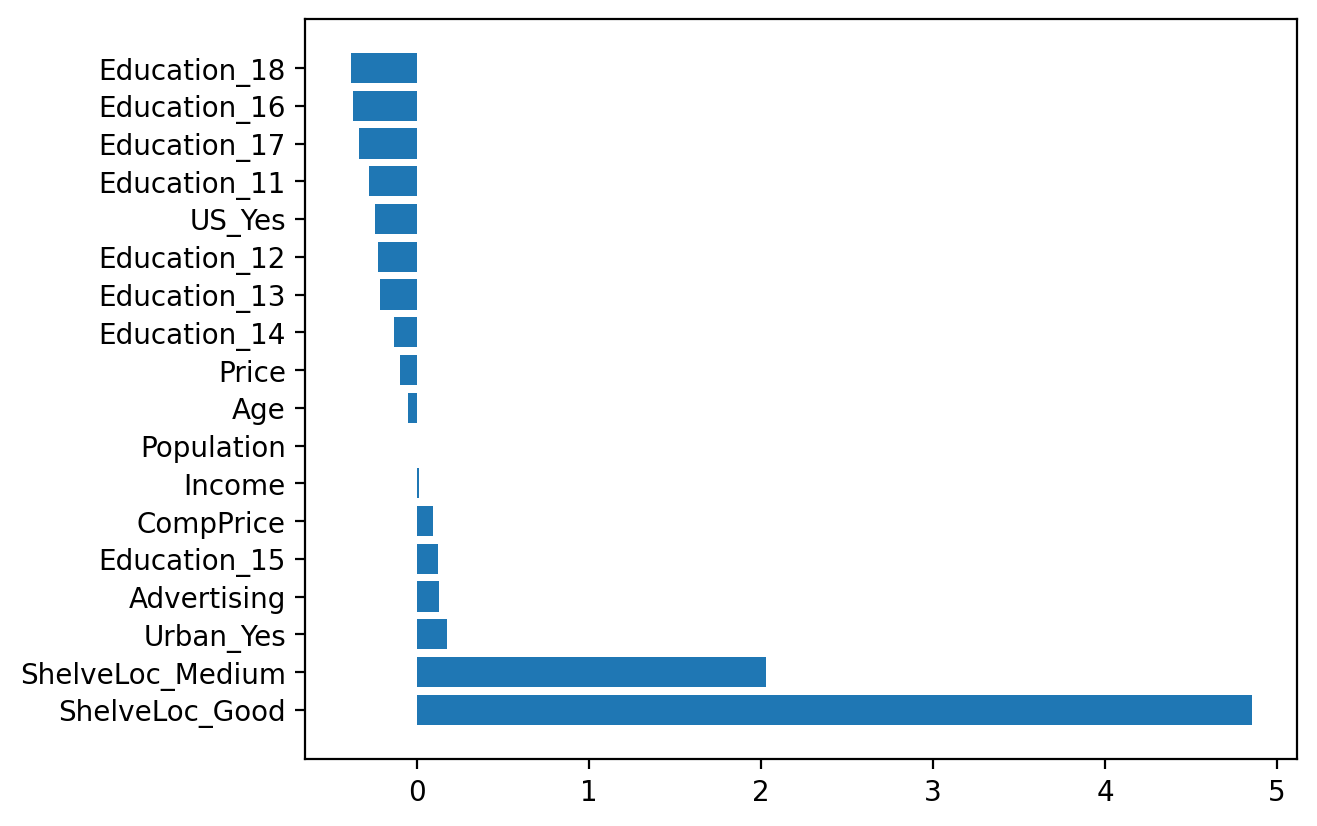

In [45]:
# 가중치 시각화
tmp = pd.DataFrame()
tmp['feature'] = list(x)
tmp['weight'] = model.coef_
tmp.sort_values(by = 'weight', ascending = False, inplace = True)
plt.barh(tmp['feature'], tmp['weight'])
plt.show()

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

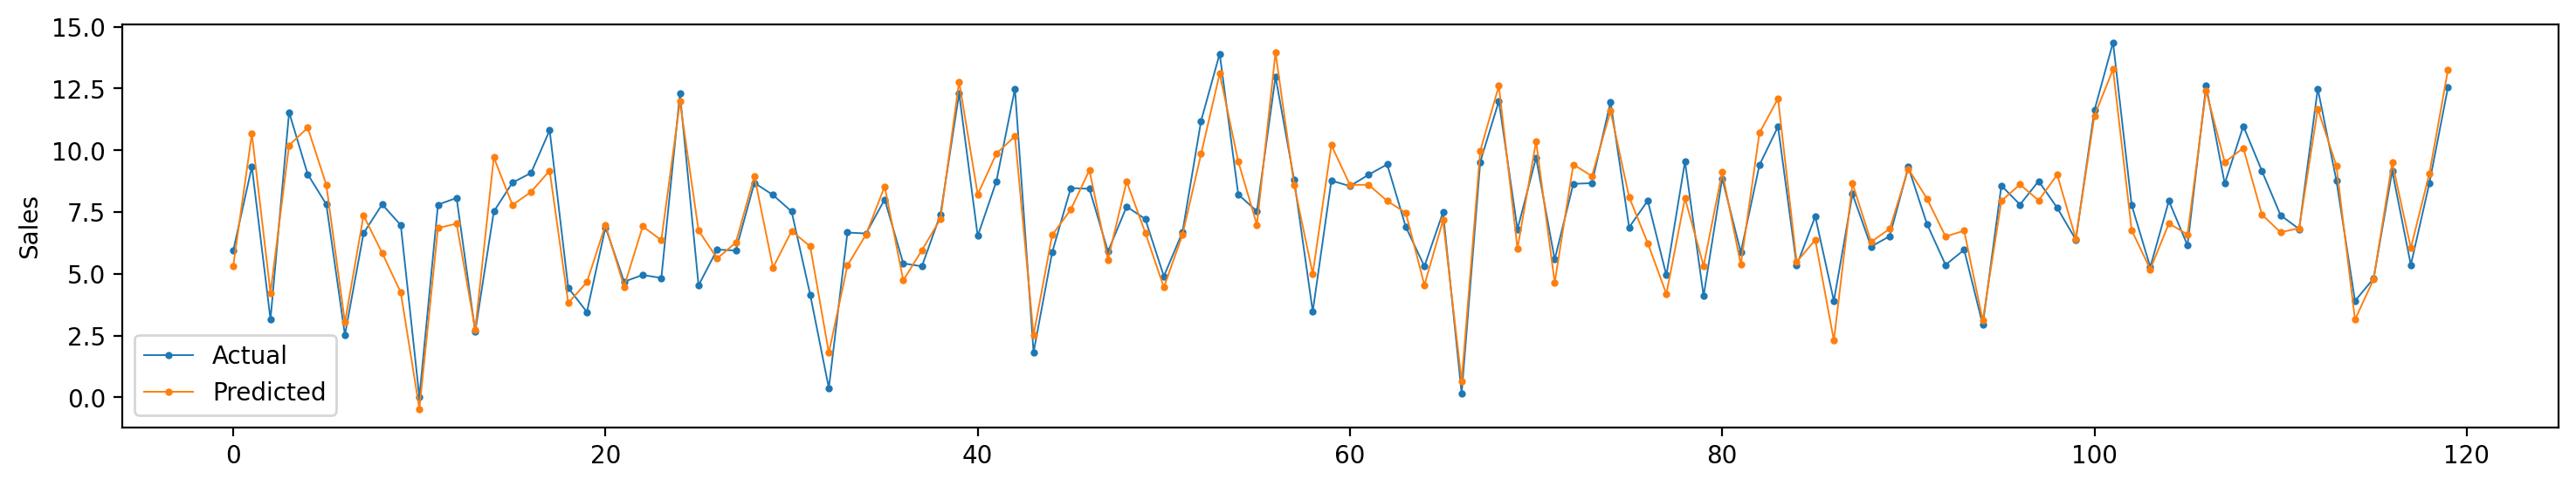

In [49]:
# 예측값, 실젯값 시각화

# 시각화
plt.figure(figsize=(18,3))
plt.plot(y_test.values, label='Actual', linewidth = 0.7, marker = 'o', markersize = 2)
plt.plot(y_pred, label='Predicted', linewidth = 0.7, marker = 'o', markersize = 2)
plt.legend()
plt.ylabel('Sales')
plt.show()

In [30]:
# dist = a * sales + b // y값
a = model.coef_
b = model.intercept_
sales = np.array([x_train.min(), x_train.max()])
dist = a * sales + b
print(sales)
print(dist)

[[77 21 0 10 24 25 False False False False False False False False False
  False False False]
 [162 120 26 509 173 80 True True True True True True True True True True
  True True]]
[[13.353078199330838 6.388423907934233 6.097879899078492
  6.0926436536375626 3.776656554517386 4.810683290701792
  6.097879899078492 6.097879899078492 6.097879899078492 6.097879899078492
  6.097879899078492 6.097879899078492 6.097879899078492 6.097879899078492
  6.097879899078492 6.097879899078492 6.097879899078492 6.097879899078492]
 [21.36206333597304 7.758131378254153 9.465700143566602
  5.8313550061351584 -10.634271709632817 1.9788507522730487
  10.953982445474281 8.126458993055167 5.82193962885231 5.873465523399944
  5.882873034714099 5.967967040878328 6.2204740699407 5.730241453032341
  5.763368680744371 5.713468155024023 6.27617297942671 5.856740784249039]]


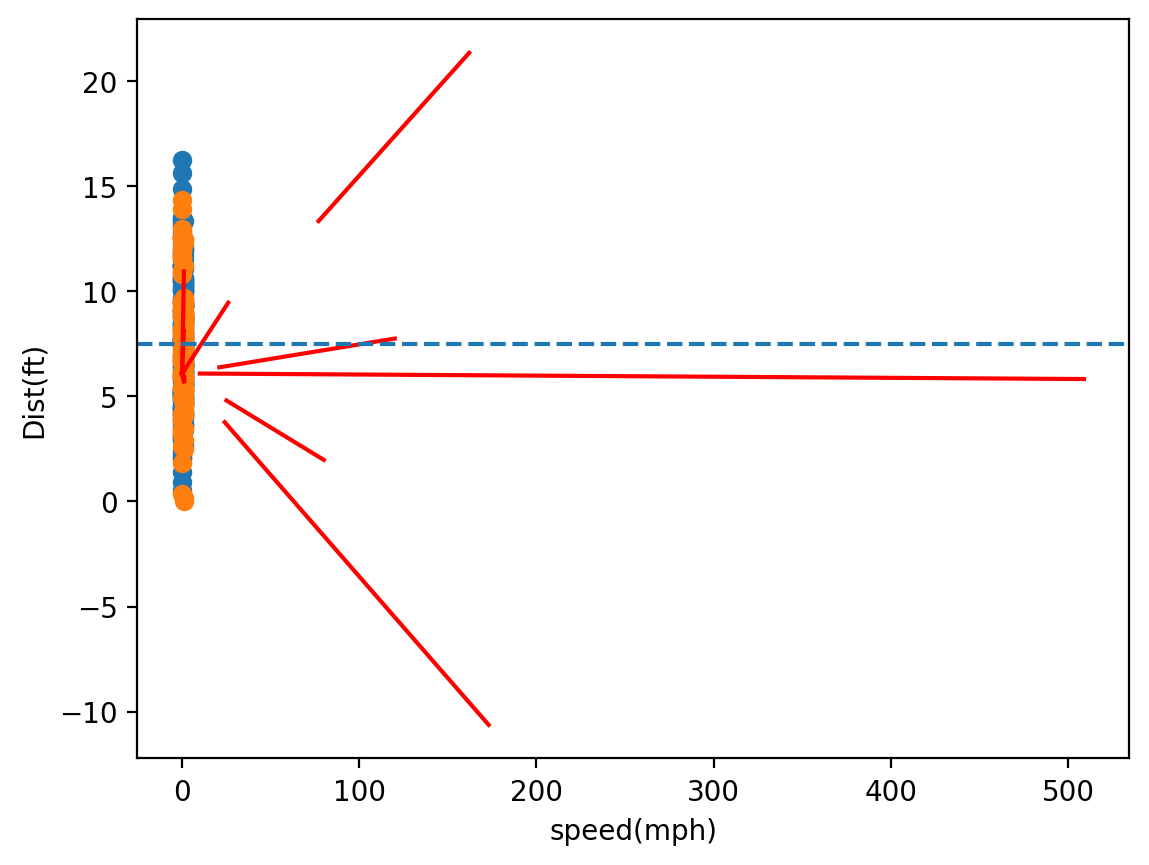